# Generating Sets of Responsive Images


The [README file](./README.md) in this directory yields this table:

| layout                                | full HD     | widescreen | desktop   | tablet     | mobile    |
| ------------------------------------- | ----------- | ---------- | --------- | ---------- | --------- |
| “hero” index splash                   | `2560×1440` | `1360×765` |           |            | `640×360` |
| index list (space time, space people) | `640×640`   |            | `360×360` |            |           |
| index list (visitors)                 |             |            |           |            | `160×160` |
| prose main image                      |             | `1280×720` |           | `1280×240` |           |
| inline-image prose                    |             | `720×1280` |           | `360×640`  |           |

We will walk through this table to _actually see_ what these responsive images look like, using the following Python libraries:

In [1]:
from IPython import display
from IPython.core.interactiveshell import InteractiveShell
from wand.color import Color
from wand.drawing import Drawing
from wand.image import Image

InteractiveShell.ast_node_interactivity = 'all'

## responsive image shared attributes

Al the responsive images will share the following attributes:

- background color
- text/label color
- text/label typeface

In [2]:
background_color_code = '#ff8c00' # DarkOrange https://en.wikipedia.org/wiki/Web_colors
text_color_code = '#fff'
font_location = './fonts/ickyticket-mono-font/IckyticketMono-nKpJ.ttf'

## the image rendering function

In [3]:
def render_image_and_save(w, h,
        output_path,
        font_size,
        label,
        max_output_width=1024, w_max=2560,
        text_coordinates=lambda w, h, text_width: (w - text_width - int(w/6), h - int(h/4))
    ):
    with Color(background_color_code) as background_color:
        with Color(text_color_code) as text_color:

            with Drawing() as draw:
                draw.fill_color = text_color
                draw.font = font_location
                draw.font_size = font_size

                with Image(width=w, height=h, background=background_color) as img:
                    font_metrics = draw.get_font_metrics(image=img, text=label) 
                    text_width = int(font_metrics.text_width)
                    x, y = text_coordinates(w, h, text_width)

                    draw.text(x, y, label)
                    draw(img)

                    img.save(filename=output_path)

    output_width = (max_output_width/w_max) * w # display images proportionally in notebook

    return display.Image(filename=output_path, width=output_width)


## “hero” index splash

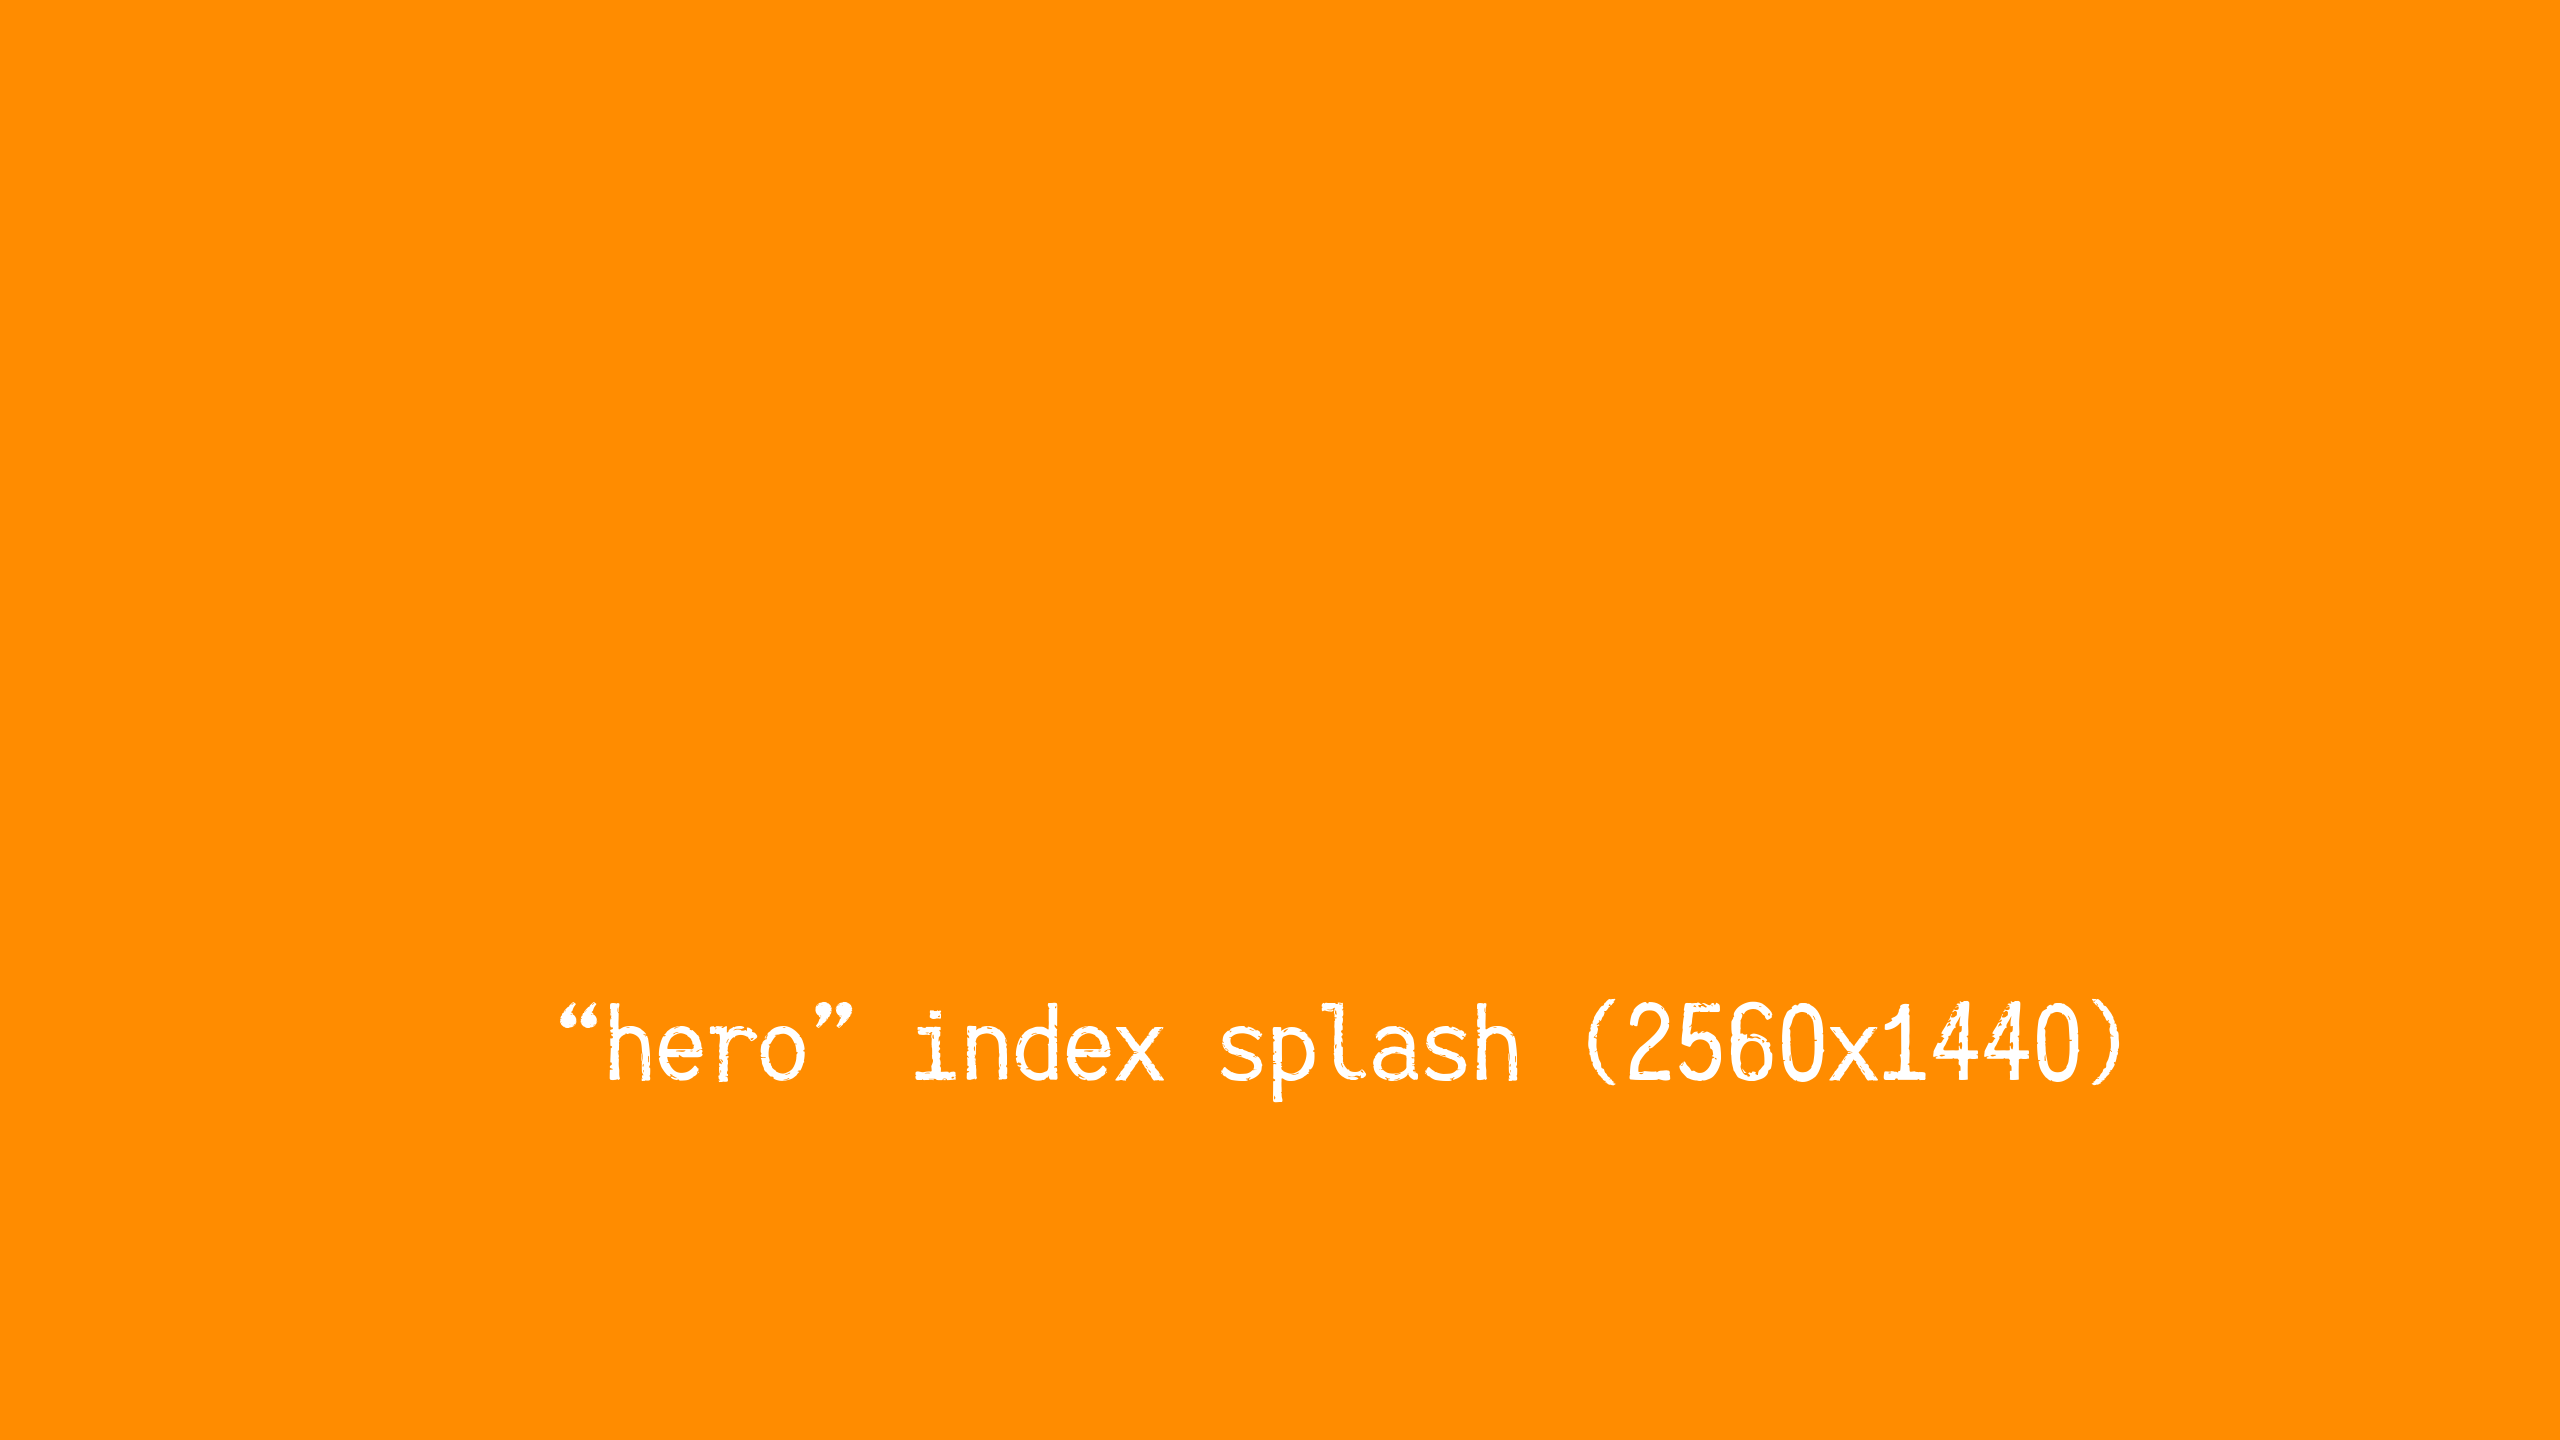

In [4]:
w, h, = 2560, 1440; root, label = 'hero-index-splash', f'“hero” index splash ({w}x{h})'
render_image_and_save(w=w, h=h, output_path=f'./{root}/{w}x{h}.png', font_size=108, label=label)

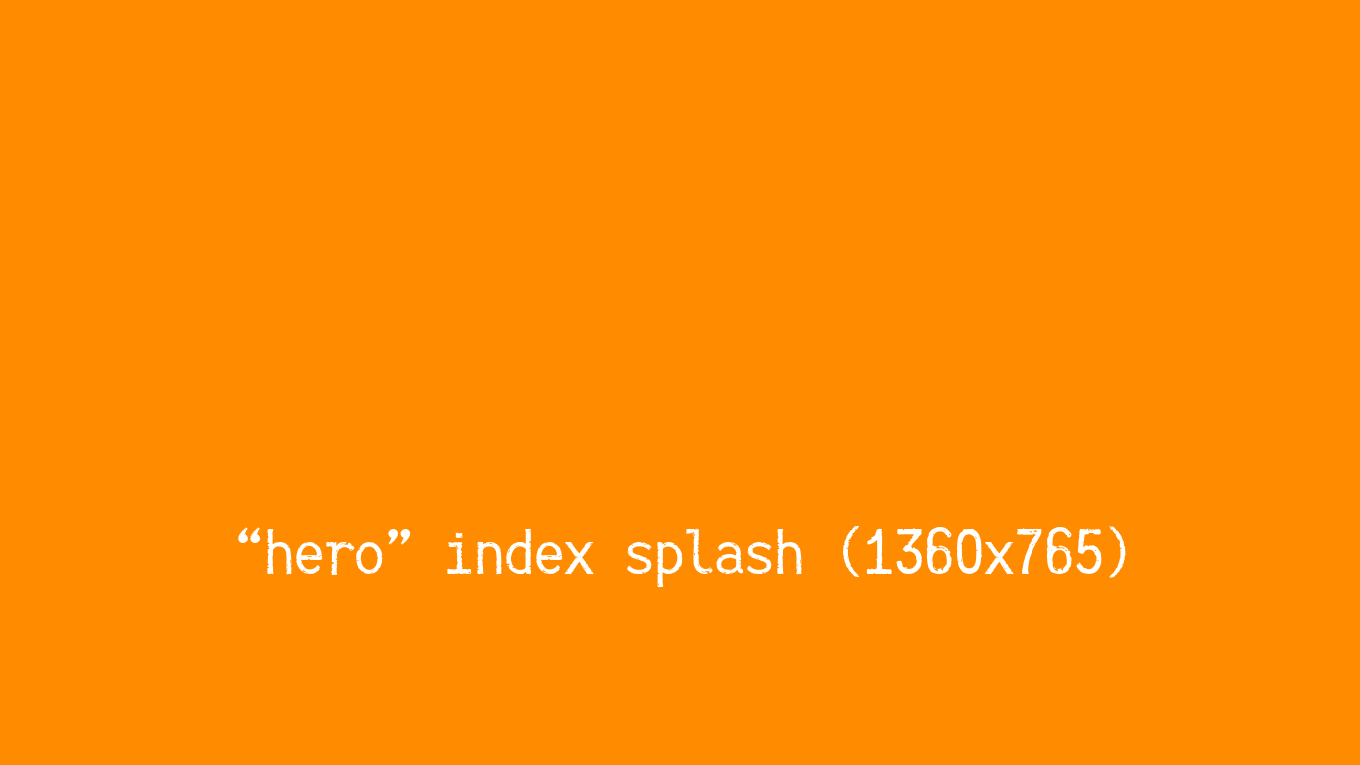

In [5]:
w, h, = 1360, 765; root, label = 'hero-index-splash', f'“hero” index splash ({w}x{h})'
render_image_and_save(w=w, h=h, output_path=f'./{root}/{w}x{h}.png', font_size=64, label=label)

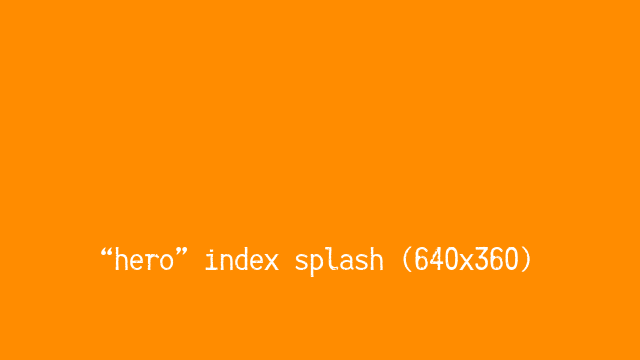

In [6]:
w, h, = 640, 360; root, label = 'hero-index-splash', f'“hero” index splash ({w}x{h})'
render_image_and_save(w=w, h=h, output_path=f'./{root}/{w}x{h}.png', font_size=32, label=label)

## <!-- -->

[Bryan Wilhite is on LinkedIn](https://www.linkedin.com/in/wilhite)🇺🇸💼